<a href="https://colab.research.google.com/github/ahmedelalaoui142/Car_price_prediction/blob/main/Avito_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
pip install pycaret

In [23]:
import numpy as np #manipulation
import pandas as pd #traitement et l'analyse
import seaborn as sns #la visualisation
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

import warnings # eliminer les erreurs de version
warnings.filterwarnings("ignore")

In [24]:

# Load the dataset to examine its structure and columns
file_path = '/content/drive/MyDrive/Dataset Avito/avito_car_dataset_ALL.csv'

data = pd.read_csv(file_path, encoding='ISO-8859-1')
# Display the first few rows to understand its structure
data.head()


,Unnamed: 0,Lien,Ville,Secteur,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Puissance fiscale,...,Caméra de recul,Vitres électriques,ABS,ESP,Régulateur de vitesse,Limiteur de vitesse,CD/MP3/Bluetooth,Ordinateur de bord,Verrouillage centralisé à distance,Prix
0,0,https://www.avito.ma/fr/massira_2/voitures/FIA...,Temara,Massira 2,Fiat,Punto,2007,200 000 - 249 999,Diesel,5,...,False,False,True,False,False,False,True,False,False,60000
1,1,https://www.avito.ma/fr/temara/voitures/Dacia_...,Temara,NaN,Dacia,Dokker Van,2013,400 000 - 449 999,Diesel,6,...,False,False,False,False,False,False,False,False,False,70000
2,2,https://www.avito.ma/fr/casablanca/voitures/Da...,Casablanca,NaN,Dacia,Dokker,2014,160 000 - 169 999,Diesel,6,...,False,False,False,False,False,False,False,False,False,90000
3,3,https://www.avito.ma/fr/casablanca/voitures/to...,Casablanca,NaN,Volkswagen,Touareg,2005,0 - 4 999,Diesel,10,...,False,False,False,False,False,False,False,False,False,90000
4,4,https://www.avito.ma/fr/dakhla/voitures/Toyota...,Dakhla,NaN,Toyota,Prado,2007,200 000 - 249 999,Diesel,12,...,False,False,True,False,False,False,True,False,False,97000


The dataset contains the following columns:

Unnamed: 0: Index column, which likely serves as an identifier for the rows in the dataset.
Lien: The URL link to the specific car listing on Avito.
Ville: The city where the car is located.
Secteur: The sector or area within the city where the car is located.
Marque: The brand or make of the car (e.g., Fiat, Dacia, Toyota).
Modèle: The specific model of the car (e.g., Punto, Dokker Van, Prado).
Année-Modèle: The model year of the car, indicating the year it was manufactured or first registered.
Kilométrage: The mileage range the car has covered (e.g., "200,000 - 249,999").
Type de carburant: The type of fuel the car uses (e.g., Diesel, Petrol).
Puissance fiscale: The fiscal horsepower of the car, which is a metric used to classify the power for tax purposes.
Boîte de vitesses: The type of gearbox/transmission (e.g., Manual, Automatic).
Première main: Indicates whether the car is a "first-hand" or not (i.e., the original owner is selling it).
Options: Any special options or features available in the car.
Couleur: The color of the car.
Seller: The type of seller (individual or professional).
Date d'annonce: The date the listing was posted.
Caméra de recul: Whether the car is equipped with a rearview camera (True/False).
Vitres électriques: Whether the car has electric windows (True/False).
ABS: Whether the car is equipped with Anti-lock Braking System (True/False).
ESP: Whether the car is equipped with Electronic Stability Program (True/False).
Régulateur de vitesse: Whether the car has cruise control (True/False).
Limiteur de vitesse: Whether the car has a speed limiter (True/False).
CD/MP3/Bluetooth: Whether the car has a CD player, MP3 capability, or Bluetooth (True/False).
Ordinateur de bord: Whether the car is equipped with a trip computer (True/False).
Verrouillage centralisé à distance: Whether the car has remote central locking (True/False).
Prix: The price of the car in the listing.


In [25]:
# Get the shape of the dataset (number of rows and columns)
data_shape = data.shape

# Get information about the dataset, including column names, non-null counts, and data types
data_info = data.info()

data_shape, data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24776 entries, 0 to 24775
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          24776 non-null  int64  
 1   Lien                                24776 non-null  object 
 2   Ville                               24776 non-null  object 
 3   Secteur                             10810 non-null  object 
 4   Marque                              24776 non-null  object 
 5   Modèle                              24776 non-null  object 
 6   Année-Modèle                        24776 non-null  int64  
 7   Kilométrage                         24776 non-null  object 
 8   Type de carburant                   24776 non-null  object 
 9   Puissance fiscale                   24776 non-null  int64  
 10  Boite de vitesses                   24776 non-null  object 
 11  Nombre de portes                    20396

((24776, 32), None)

In [26]:
data['Boite de vitesses'].value_counts()


,count
Boite de vitesses,
Manuelle,17452
Automatique,4418
--,2906


In [27]:
data['Boite de vitesses'].replace(to_replace='--',value='Manuelle',inplace=True)

In [28]:
data['Nombre de portes'].value_counts()

,count
Nombre de portes,
5.0,19435
3.0,961


In [29]:
# Replace NaN values in 'Nombre de portes' with 5
data['Nombre de portes'].fillna(5, inplace=True)

# Verify that NaN values have been replaced
nan_count = data['Nombre de portes'].isna().sum()
nan_count


0

In [30]:
data['État'].value_counts()


,count
État,
Excellent,8761
Très bon,7402
Bon,1833
Correct,90
Pour Pièces,9
Endommagé,3


In [31]:
# Replace NaN values in 'État' with 'Bon'
data['État'].fillna('Bon', inplace=True)

# Verify that NaN values have been replaced
nan_count_etat = data['État'].isna().sum()
nan_count_etat


0

In [32]:

# Replace NaN values in 'Origine' with 'WW au Maroc'
data['Origine'].fillna('WW au Maroc', inplace=True)

# Verify that NaN values have been replaced
nan_count_etat = data['État'].isna().sum()
nan_count_etat


0

In [33]:
data['Première main'].value_counts()


,count
Première main,
Non,11788
Oui,6779


In [34]:
data['Première main'].fillna('Non', inplace=True)

# Verify that NaN values have been replaced
nan_count_etat = data['État'].isna().sum()
nan_count_etat

0

In [35]:
data.replace(to_replace=True,value=1,inplace=True)
data.replace(to_replace=False,value=0,inplace=True)

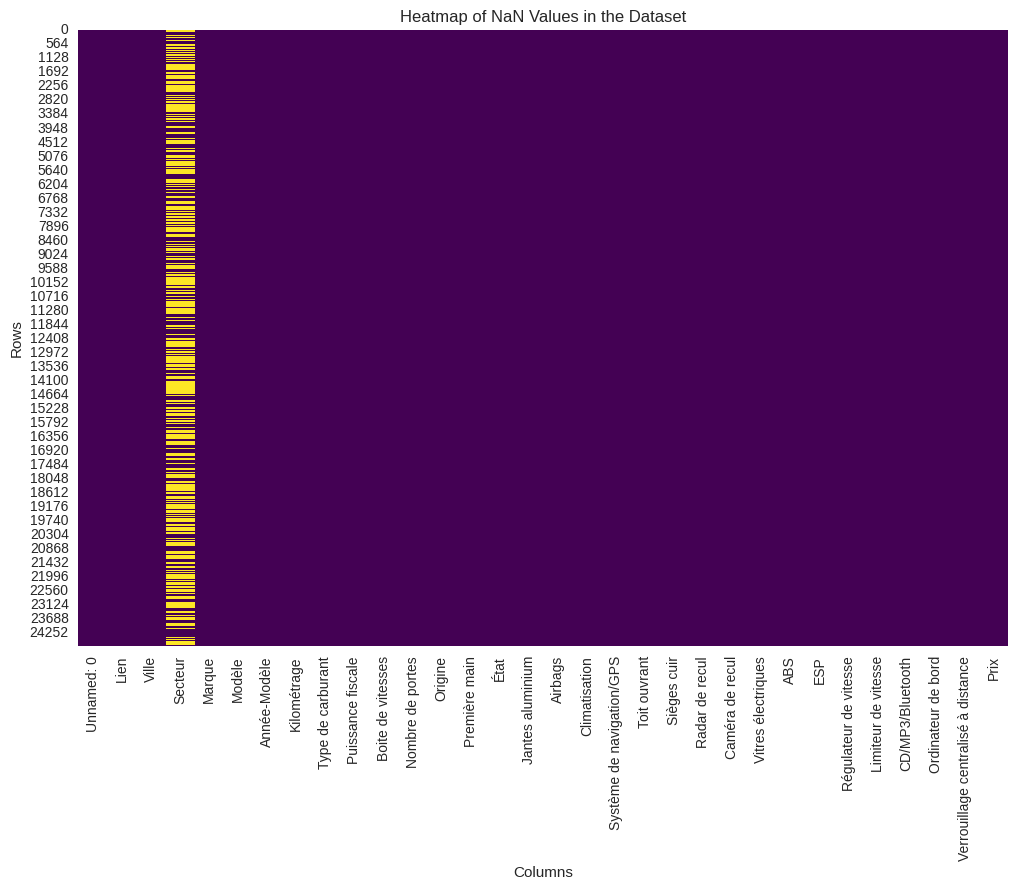

In [36]:

# Plot the heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of NaN Values in the Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


In [37]:
data.isna().sum()


,0
Unnamed: 0,0
Lien,0
Ville,0
Secteur,13966
Marque,0
Modèle,0
Année-Modèle,0
Kilométrage,0
Type de carburant,0
Puissance fiscale,0


In [38]:
# Drop the columns 'Unnamed: 0', 'Lien', and 'Secteur'
data.drop(columns=['Unnamed: 0', 'Lien', 'Secteur'], inplace=True)

# Verify that the columns have been dropped
data.columns.tolist()


['Ville',
 'Marque',
 'Modèle',
 'Année-Modèle',
 'Kilométrage',
 'Type de carburant',
 'Puissance fiscale',
 'Boite de vitesses',
 'Nombre de portes',
 'Origine',
 'Première main',
 'État',
 'Jantes aluminium',
 'Airbags',
 'Climatisation',
 'Système de navigation/GPS',
 'Toit ouvrant',
 'Sièges cuir',
 'Radar de recul',
 'Caméra de recul',
 'Vitres électriques',
 'ABS',
 'ESP',
 'Régulateur de vitesse',
 'Limiteur de vitesse',
 'CD/MP3/Bluetooth',
 'Ordinateur de bord',
 'Verrouillage centralisé à distance',
 'Prix']

In [39]:
data.isna().sum()


,0
Ville,0
Marque,0
Modèle,0
Année-Modèle,0
Kilométrage,0
Type de carburant,0
Puissance fiscale,0
Boite de vitesses,0
Nombre de portes,0
Origine,0


In [40]:
data.head()

,Ville,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Puissance fiscale,Boite de vitesses,Nombre de portes,Origine,...,Caméra de recul,Vitres électriques,ABS,ESP,Régulateur de vitesse,Limiteur de vitesse,CD/MP3/Bluetooth,Ordinateur de bord,Verrouillage centralisé à distance,Prix
0,Temara,Fiat,Punto,2007,200 000 - 249 999,Diesel,5,Manuelle,5.0,WW au Maroc,...,0,0,1,0,0,0,1,0,0,60000
1,Temara,Dacia,Dokker Van,2013,400 000 - 449 999,Diesel,6,Manuelle,3.0,WW au Maroc,...,0,0,0,0,0,0,0,0,0,70000
2,Casablanca,Dacia,Dokker,2014,160 000 - 169 999,Diesel,6,Manuelle,5.0,WW au Maroc,...,0,0,0,0,0,0,0,0,0,90000
3,Casablanca,Volkswagen,Touareg,2005,0 - 4 999,Diesel,10,Automatique,5.0,WW au Maroc,...,0,0,0,0,0,0,0,0,0,90000
4,Dakhla,Toyota,Prado,2007,200 000 - 249 999,Diesel,12,Manuelle,5.0,WW au Maroc,...,0,0,1,0,0,0,1,0,0,97000


In [41]:
data['Ville'].value_counts()

,count
Ville,
Casablanca,6270
Rabat,1849
Marrakech,1508
Fès,1431
Agadir,1332
...,...
Sidi Bou Othmane,3
Meknassa Al Gharbia,3
Tahla,3


In [42]:
# Extract the list of unique cities from the 'Ville' column
unique_cities = data['Ville'].unique()

# Create a DataFrame to structure the coordinates lookup
city_coordinates_df = pd.DataFrame(unique_cities, columns=['City'])



In [43]:
import requests
import time

# Function to get city coordinates
def get_city_coordinates(city, username):
    url = f"http://api.geonames.org/searchJSON?q={city}&country=MA&maxRows=1&username={username}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if 'geonames' in data and data['geonames']:
            lat = data['geonames'][0]['lat']
            lng = data['geonames'][0]['lng']
            return lat, lng
        else:
            return None, None
    else:
        print(f"Error: {response.status_code}")
        return None, None

# Replace 'your_username' with your actual GeoNames username
username = 'your_username'

# Initialize columns for latitude and longitude
city_coordinates_df['Latitude'] = None
city_coordinates_df['Longitude'] = None

# Fetch coordinates for each city
for index, row in city_coordinates_df.iterrows():
    city = row['City']
    lat, lng = get_city_coordinates(city, username)
    city_coordinates_df.at[index, 'Latitude'] = lat
    city_coordinates_df.at[index, 'Longitude'] = lng
    print(f"Processed {city}: Latitude {lat}, Longitude {lng}")

    # To avoid hitting rate limits, you may add a delay between requests
    time.sleep(1)

# Display the DataFrame with coordinates
city_coordinates_df


Processed Temara: Latitude 33.92866, Longitude -6.90656
Processed Casablanca: Latitude 33.58831, Longitude -7.61138
Processed Dakhla: Latitude 23.68477, Longitude -15.95798
Processed Khouribga: Latitude 32.88108, Longitude -6.9063
Processed Meknès: Latitude 33.89352, Longitude -5.54727
Processed Mohammedia: Latitude 33.68607, Longitude -7.38298
Processed Fquih Ben Saleh: Latitude None, Longitude None
Processed Fès: Latitude 34.03313, Longitude -5.00028
Processed Ait Melloul: Latitude 30.34164, Longitude -9.50356
Processed Tétouan: Latitude 35.57845, Longitude -5.36837
Processed Tanger: Latitude 35.76727, Longitude -5.79975
Processed Rabat: Latitude 34.01325, Longitude -6.83255
Processed Marrakech: Latitude 31.63416, Longitude -7.99994
Processed Taza: Latitude 34.21, Longitude -4.01
Processed Taounate: Latitude 34.5, Longitude -4.16667
Processed El Jadida: Latitude 33.25682, Longitude -8.50882
Processed Kénitra: Latitude 34.01325, Longitude -6.83255
Processed Sidi Bou Othmane: Latitude 

,City,Latitude,Longitude
0,Temara,33.92866,-6.90656
1,Casablanca,33.58831,-7.61138
2,Dakhla,23.68477,-15.95798
3,Khouribga,32.88108,-6.9063
4,Meknès,33.89352,-5.54727
...,...,...,...
186,Goulmima,31.69227,-4.95256
187,Boughriba,34.91342,-2.51167
188,Taliouine,30.52917,-7.91262
189,Arbaoua,34.90239,-5.94871


In [44]:
city_coordinates_df.isna().sum()

,0
City,0
Latitude,5
Longitude,5


In [45]:
cities_with_nan_coordinates = city_coordinates_df[city_coordinates_df['Latitude'].isna()]

# Calculate the frequency of these cities in the original data
nan_city_frequencies = data[data['Ville'].isin(cities_with_nan_coordinates['City'])]['Ville'].value_counts()


nan_city_frequencies

,count
Ville,
Fquih Ben Saleh,84
Inzegan,15
Imouzzer-Kendar,6
Al Oioun Sidi Mellouk,3
Mrir't,3


In [46]:
import folium
import pandas as pd

# Ensure that city_coordinates_df has been merged with frequencies from the original data
city_coordinates_df['Count'] = city_coordinates_df['City'].map(data['Ville'].value_counts())

# Filter out rows where latitude or longitude is NaN
valid_cities = city_coordinates_df.dropna(subset=['Latitude', 'Longitude'])

# Create a base map centered around Morocco
morocco_map = folium.Map(location=[31.7917, -7.0926], zoom_start=6)

# Plot cities on the map with frequency
for _, row in valid_cities.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=row['Count'] / 500,  # Adjust the size based on the count
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['City']}: {row['Count']} listings"
    ).add_to(morocco_map)





In [47]:
morocco_map

In [48]:
# Get the top 10 cities by frequency
top_10_cities = valid_cities.nlargest(10, 'Count')[['City', 'Count']]

In [49]:
# Get the top 5 cities by frequency
top_10_cities

,City,Count
1,Casablanca,6270
11,Rabat,1849
12,Marrakech,1508
7,Fès,1431
20,Agadir,1332
10,Tanger,1323
4,Meknès,1066
21,Salé,944
16,Kénitra,932
15,El Jadida,617


In [50]:
data.describe().round(2)


,Année-Modèle,Puissance fiscale,Nombre de portes,Jantes aluminium,Airbags,Climatisation,Système de navigation/GPS,Toit ouvrant,Sièges cuir,Radar de recul,Caméra de recul,Vitres électriques,ABS,ESP,Régulateur de vitesse,Limiteur de vitesse,CD/MP3/Bluetooth,Ordinateur de bord,Verrouillage centralisé à distance,Prix
count,24776.00,24776.00,24776.00,24776.0,24776.00,24776.00,24776.0,24776.0,24776.0,24776.0,24776.0,24776.0,24776.00,24776.00,24776.0,24776.0,24776.00,24776.0,24776.0,2.477600e+04
mean,2011.84,7.19,4.92,0.0,0.57,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.53,0.37,0.0,0.0,0.52,0.0,0.0,2.169588e+05
std,5.46,1.57,0.39,0.0,0.50,0.49,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.48,0.0,0.0,0.50,0.0,0.0,6.749569e+06
min,1990.00,5.00,3.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,6.000000e+04
25%,2008.00,6.00,5.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,7.500000e+04
50%,2013.00,7.00,5.00,0.0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.0,1.00,0.0,0.0,1.000000e+05
75%,2016.00,8.00,5.00,0.0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1.00,0.0,0.0,1.00,0.0,0.0,1.400000e+05
max,2022.00,14.00,5.00,0.0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1.00,0.0,0.0,1.00,0.0,0.0,6.120372e+08


In [51]:
data['Année-Modèle'] = data['Année-Modèle'].astype(int)
data['Nombre de portes'] = data['Nombre de portes'].astype(int)

In [52]:
splited = data['Kilométrage'].str.split("-", n = 1, expand = True)
splited[0] = splited[0].str.replace(' ','').astype(int)
splited[1] = splited[1].str.replace(' ','').astype(int)
data['Kilométrage'] = (splited[1] + splited[0])/2

In [53]:
data['Puissance fiscale'] = data['Puissance fiscale'].astype(int)


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24776 entries, 0 to 24775
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Ville                               24776 non-null  object 
 1   Marque                              24776 non-null  object 
 2   Modèle                              24776 non-null  object 
 3   Année-Modèle                        24776 non-null  int64  
 4   Kilométrage                         24776 non-null  float64
 5   Type de carburant                   24776 non-null  object 
 6   Puissance fiscale                   24776 non-null  int64  
 7   Boite de vitesses                   24776 non-null  object 
 8   Nombre de portes                    24776 non-null  int64  
 9   Origine                             24776 non-null  object 
 10  Première main                       24776 non-null  object 
 11  État                                24776

In [55]:
categorical_columns = [
    'Ville', 'Marque', 'Modèle', 'Année-Modèle', 'Kilométrage',
    'Type de carburant', 'Boite de vitesses', 'Origine', 'Première main', 'État'
]

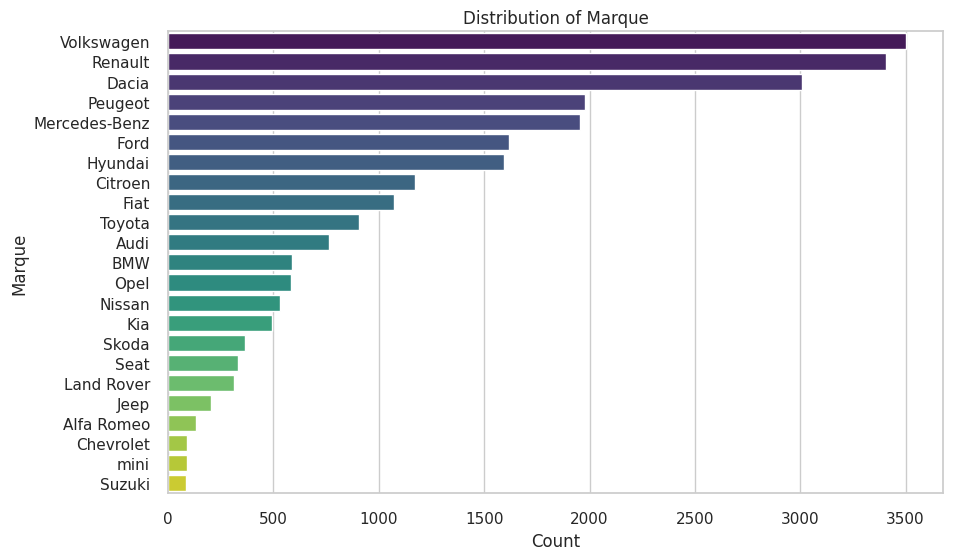

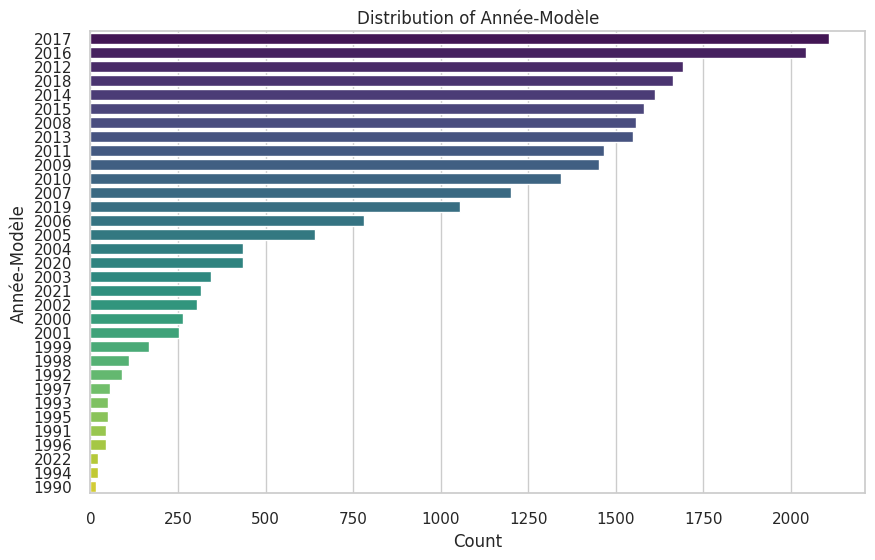

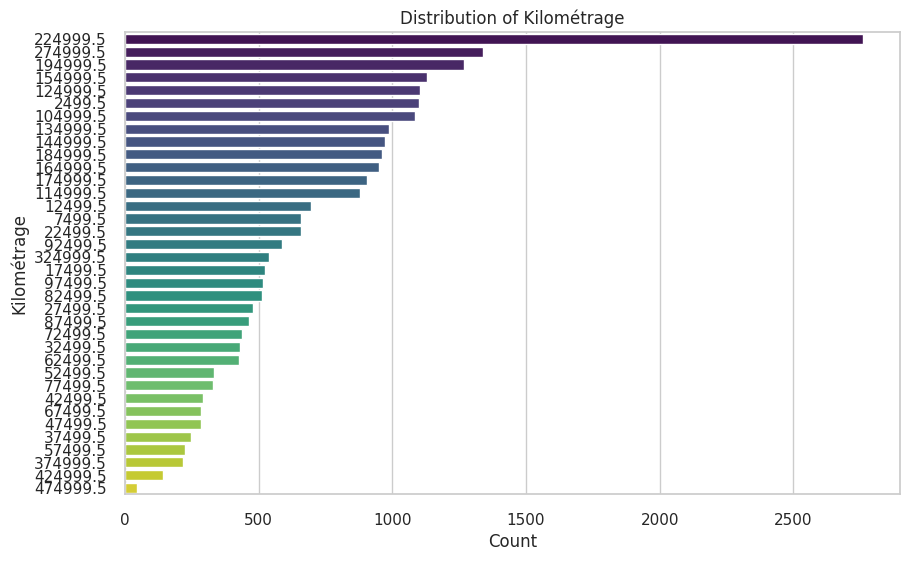

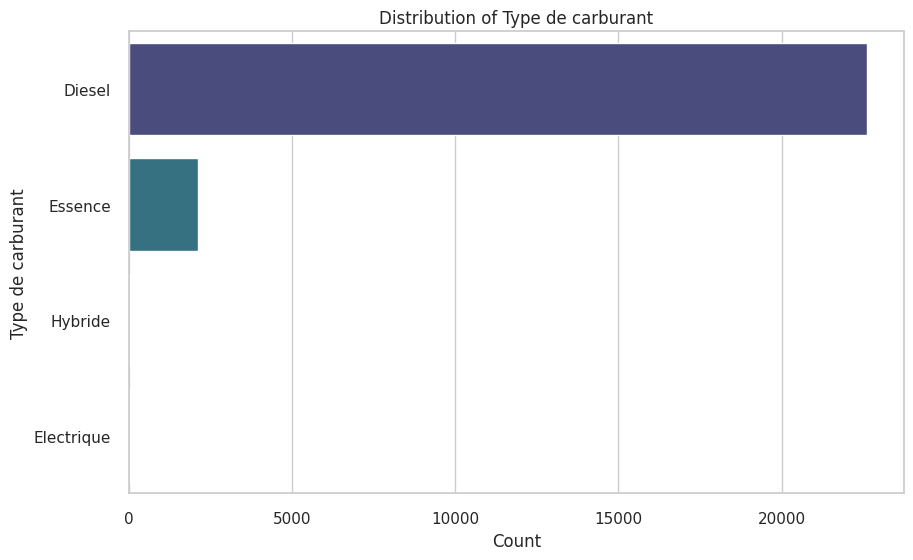

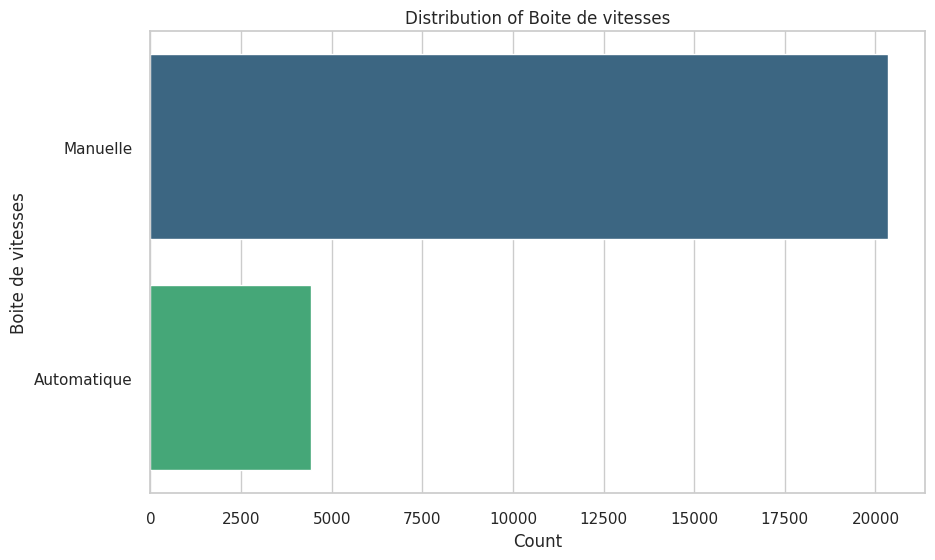

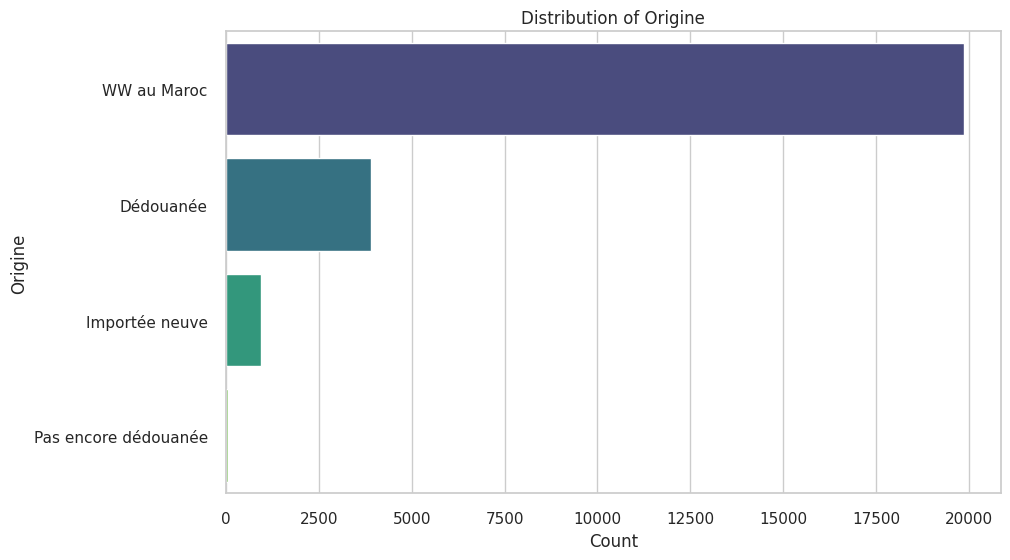

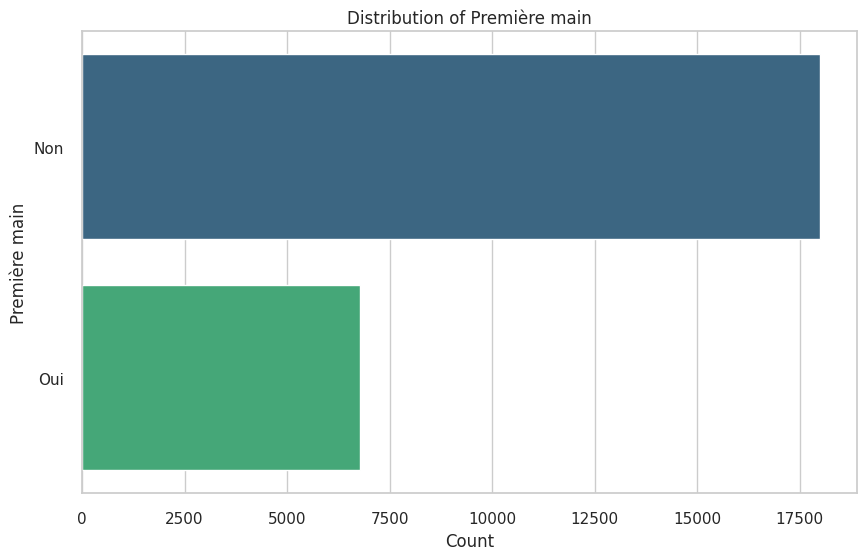

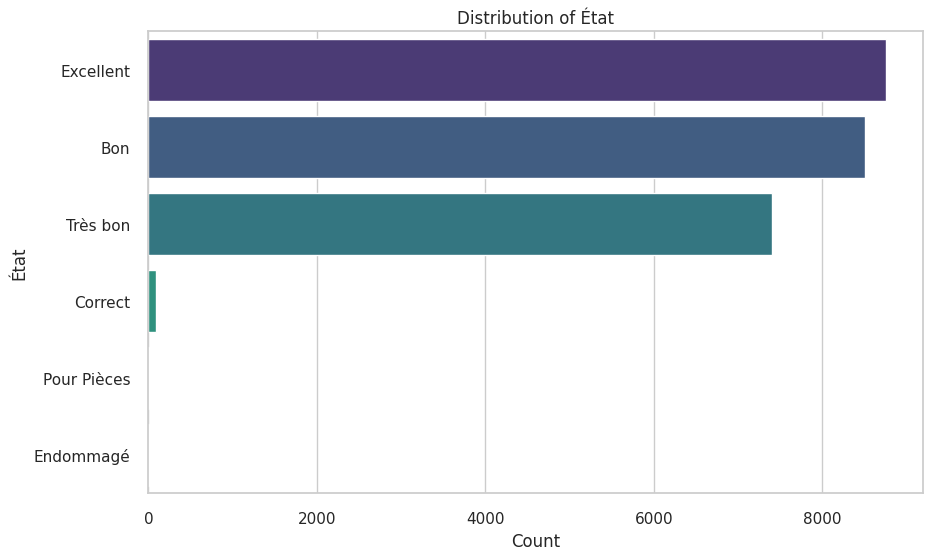

In [56]:
# List of categorical columns to visualize, excluding 'Ville' and 'Modèle'
categorical_columns_filtered = [
    'Marque', 'Année-Modèle', 'Kilométrage',
    'Type de carburant', 'Boite de vitesses', 'Origine', 'Première main', 'État'
]

# Plot bar charts for each filtered categorical column
sns.set_theme(style="whitegrid")

# Plot bar charts for each filtered categorical column with more color
for column in categorical_columns_filtered:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, y=column, order=data[column].value_counts().index, palette="viridis")
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()


In [57]:
# Calculate the frequency of each marque
marque_counts = data['Marque'].value_counts()

# Determine the threshold for rare marques (25th percentile)
threshold = marque_counts.quantile(0.25)

# Identify rare marques (those with a frequency below the threshold)
rare_marques = marque_counts[marque_counts < threshold].index.tolist()

# Display the rare marques and their counts
rare_marques_counts = marque_counts[marque_counts < threshold]

In [58]:
rare_marques_counts

,count
Marque,
Land Rover,312
Jeep,202
Alfa Romeo,130
Chevrolet,91
mini,88
Suzuki,87


In [59]:
data['Marque'] = data['Marque'].apply(lambda x: 'Other' if x in rare_marques else x)

# Display the updated data
data['Marque'].value_counts()

,count
Marque,
Volkswagen,3503
Renault,3406
Dacia,3009
Peugeot,1977
Mercedes-Benz,1953
Ford,1617
Hyundai,1593
Citroen,1174
Fiat,1070


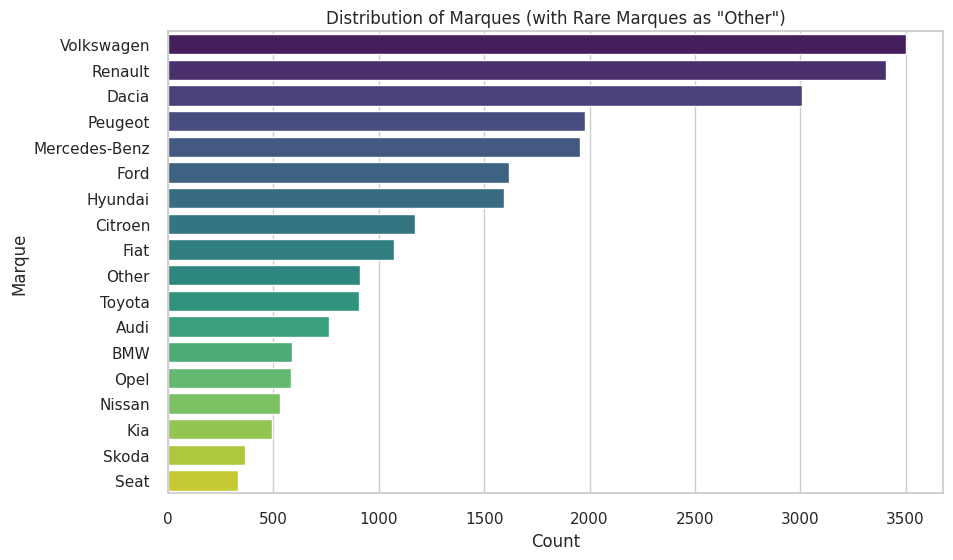

In [60]:
# Visualize the updated distribution of "Marque" after grouping rare marques as "Other"
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='Marque', order=data['Marque'].value_counts().index, palette="viridis")
plt.title('Distribution of Marques (with Rare Marques as "Other")')
plt.xlabel('Count')
plt.ylabel('Marque')
plt.show()


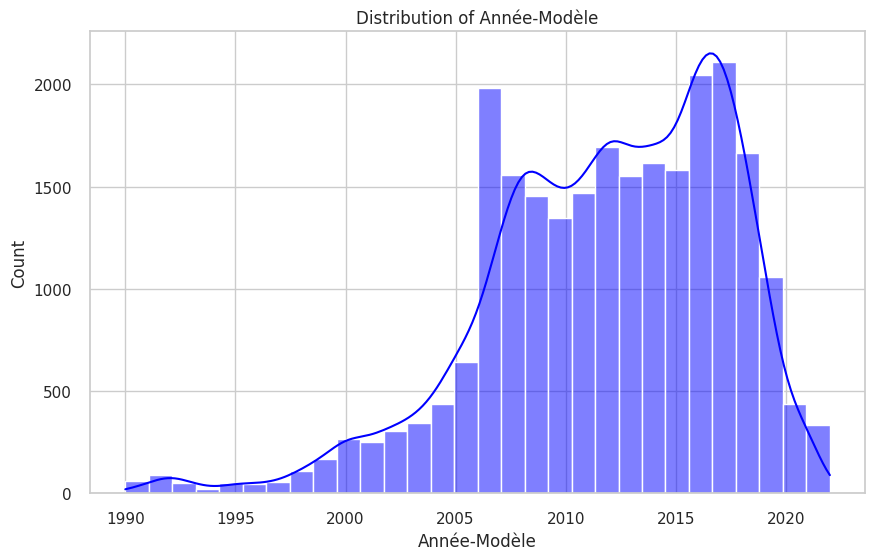

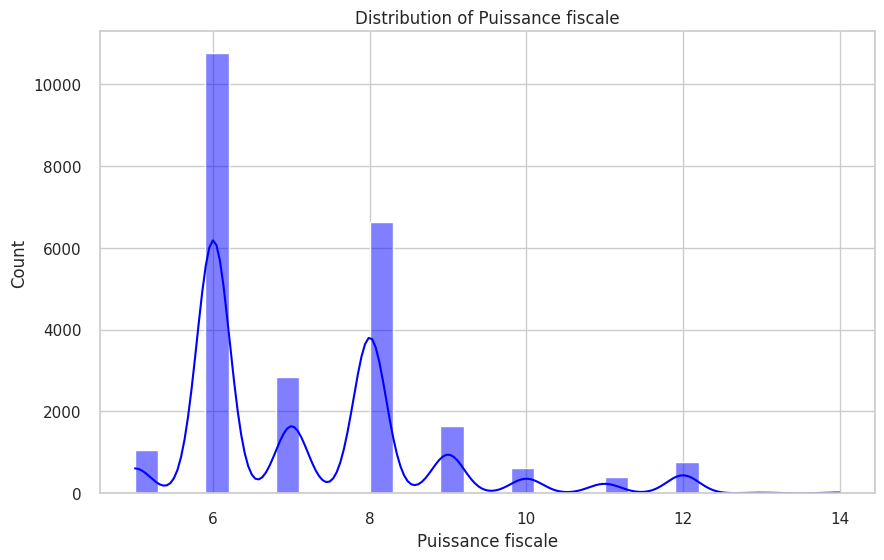

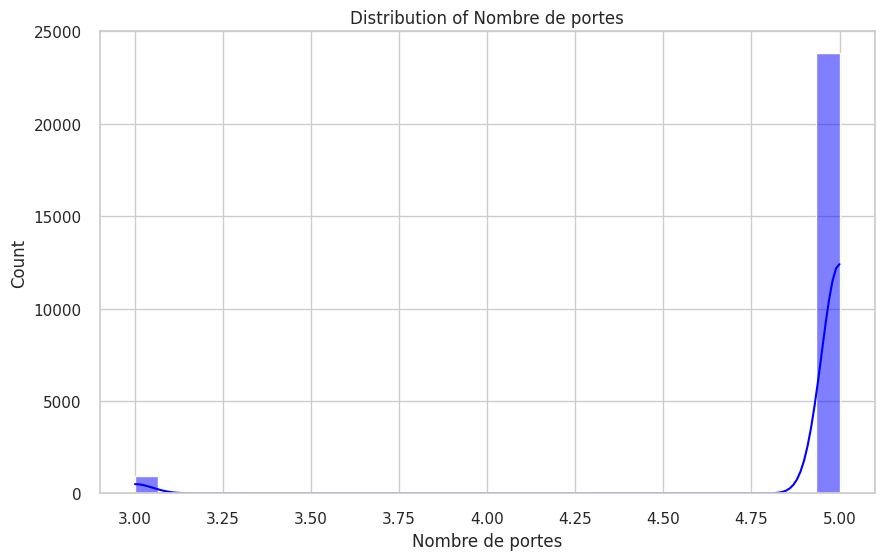

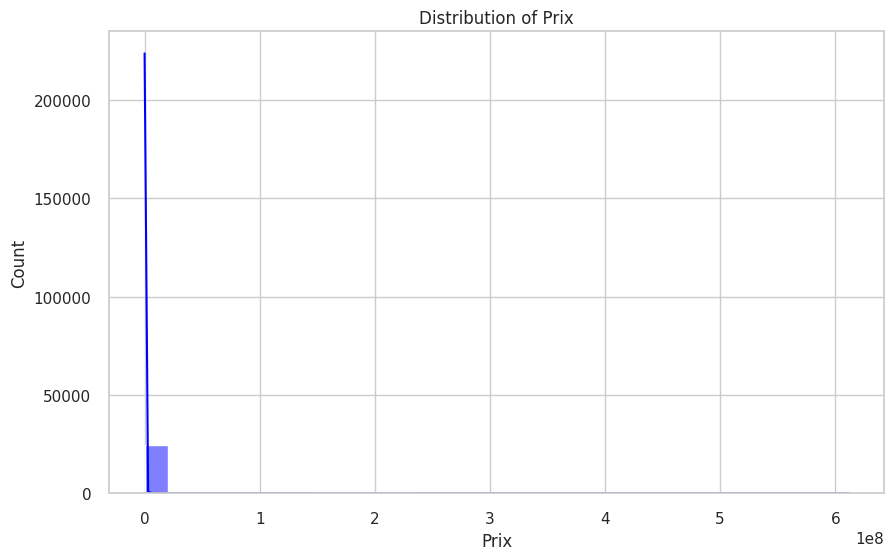

In [61]:
# Select numerical columns from the dataset
numerical_columns = ['Année-Modèle', 'Puissance fiscale', 'Nombre de portes', 'Prix']

# Plot histograms for each numerical column to visualize their distributions
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


count    2.477600e+04
mean     2.169588e+05
std      6.749569e+06
min      6.000000e+04
25%      7.500000e+04
50%      1.000000e+05
75%      1.400000e+05
max      6.120372e+08
Name: Prix, dtype: float64


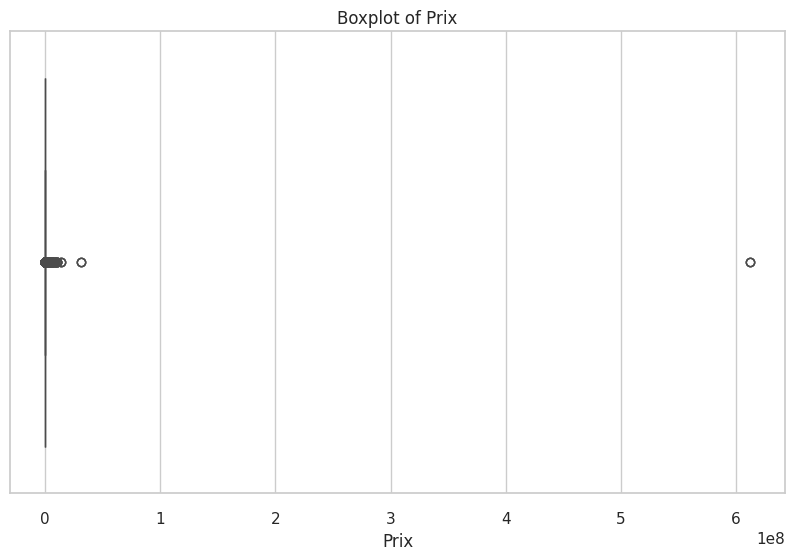

In [62]:
# Descriptive statistics for the 'Prix' variable
prix_stats = data['Prix'].describe()

# Display descriptive statistics
print(prix_stats)

# Plot a boxplot to visualize the distribution and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Prix'])
plt.title('Boxplot of Prix')
plt.xlabel('Prix')
plt.show()


In [63]:
# Calculate descriptive statistics for "Prix" grouped by "Modèle"
model_price_stats = data.groupby('Modèle')['Prix'].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95])


# Show the descriptive statistics to help in setting the thresholds
model_price_stats


,count,mean,std,min,25%,50%,75%,90%,95%,max
Modèle,,,,,,,,,,
1007,3.0,6.500000e+04,0.000000e+00,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0,65000.0
104,6.0,6.250000e+04,2.738613e+03,60000.0,60000.0,62500.0,65000.0,65000.0,65000.0,65000.0
108,12.0,8.900000e+04,7.781096e+03,78000.0,84750.0,90000.0,94250.0,98000.0,98000.0,98000.0
12,24.0,7.665565e+07,2.067076e+08,60000.0,68750.0,79000.0,256250.0,428657043.5,612037205.0,612037205.0
126,6.0,7.700000e+04,3.286335e+03,74000.0,74000.0,77000.0,80000.0,80000.0,80000.0,80000.0
...,...,...,...,...,...,...,...,...,...,...
i 20,36.0,1.075000e+05,3.132092e+04,65000.0,83250.0,100500.0,136000.0,147000.0,152000.0,152000.0
i 30,151.0,1.231192e+05,3.378914e+04,83000.0,97000.0,117000.0,138000.0,175000.0,185000.0,241000.0
i 40,49.0,2.140612e+05,2.676706e+05,125000.0,135000.0,150000.0,160000.0,180000.0,822000.0,1250000.0


In [64]:
# Calculate the 95th percentile price cap for each "Marque"
price_cap_95th = data.groupby('Marque')['Prix'].quantile(0.95)

# Apply the cap to the "Prix" column based on the "Marque"
data['Prix'] = data.apply(lambda x: min(x['Prix'], price_cap_95th[x['Marque']]), axis=1)

# Verify the effect of the capping

# Display summary of capped prices
data.describe()


,Année-Modèle,Kilométrage,Puissance fiscale,Nombre de portes,Jantes aluminium,Airbags,Climatisation,Système de navigation/GPS,Toit ouvrant,Sièges cuir,...,Caméra de recul,Vitres électriques,ABS,ESP,Régulateur de vitesse,Limiteur de vitesse,CD/MP3/Bluetooth,Ordinateur de bord,Verrouillage centralisé à distance,Prix
count,24776.000000,24776.000000,24776.000000,24776.000000,24776.0,24776.000000,24776.000000,24776.0,24776.0,24776.0,...,24776.0,24776.0,24776.000000,24776.000000,24776.0,24776.0,24776.000000,24776.0,24776.0,24776.000000
mean,2011.844244,133035.199871,7.193938,4.922425,0.0,0.569826,0.594083,0.0,0.0,0.0,...,0.0,0.0,0.529181,0.368300,0.0,0.0,0.522966,0.0,0.0,120042.345778
std,5.462925,89088.887159,1.574124,0.386184,0.0,0.495110,0.491079,0.0,0.0,0.0,...,0.0,0.0,0.499158,0.482353,0.0,0.0,0.499482,0.0,0.0,64376.438136
min,1990.000000,2499.500000,5.000000,3.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,60000.000000
25%,2008.000000,62499.500000,6.000000,5.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,75000.000000
50%,2013.000000,124999.500000,7.000000,5.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,...,0.0,0.0,1.000000,0.000000,0.0,0.0,1.000000,0.0,0.0,100000.000000
75%,2016.000000,194999.500000,8.000000,5.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,...,0.0,0.0,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,140000.000000
max,2022.000000,474999.500000,14.000000,5.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,...,0.0,0.0,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,509000.000000


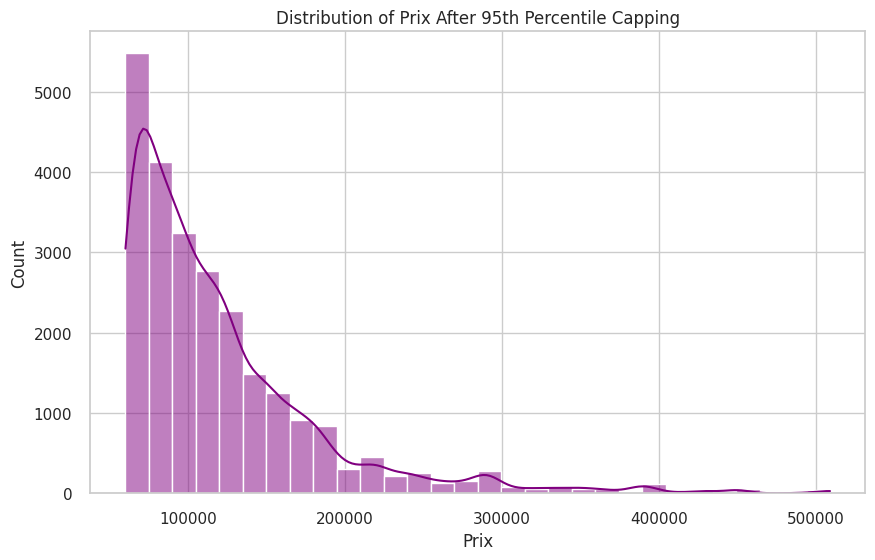

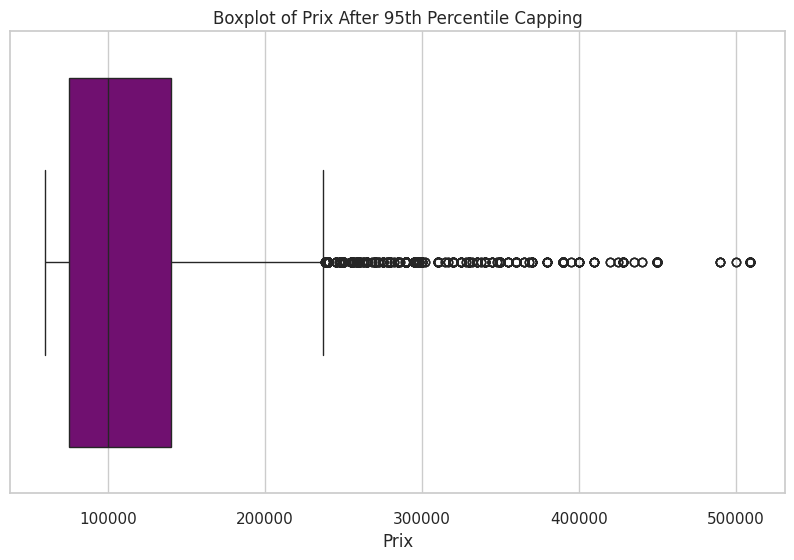

In [65]:
# Visualize the updated distribution of "Prix" after applying the 95th percentile cap
plt.figure(figsize=(10, 6))
sns.histplot(data['Prix'], bins=30, kde=True, color='purple')
plt.title('Distribution of Prix After 95th Percentile Capping')
plt.xlabel('Prix')
plt.ylabel('Count')
plt.show()

# Boxplot to visualize distribution and potential outliers after capping
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Prix'], color='purple')
plt.title('Boxplot of Prix After 95th Percentile Capping')
plt.xlabel('Prix')
plt.show()


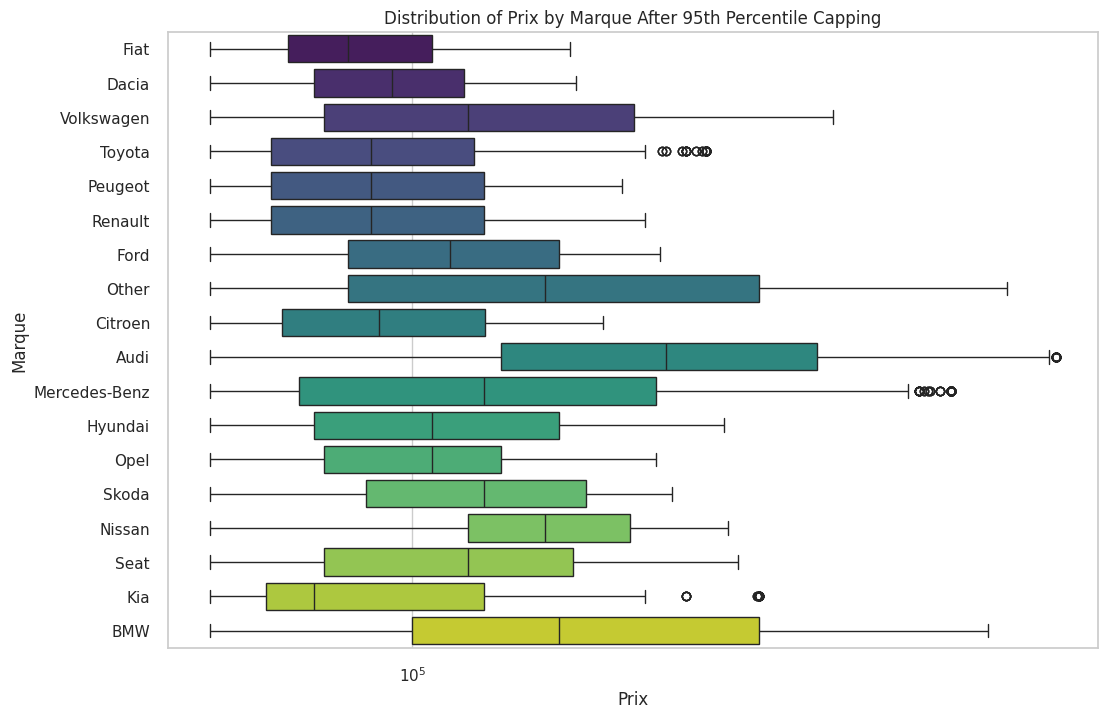

In [66]:
# Visualize the distribution of "Prix" across different "Marque"
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, y='Marque', x='Prix', palette="viridis")
plt.title('Distribution of Prix by Marque After 95th Percentile Capping')
plt.xlabel('Prix')
plt.ylabel('Marque')
plt.xscale('log')  # Use a log scale to handle wide price ranges
plt.show()


In [67]:
group=data.groupby("Marque")["Prix"].mean()
group.sort_values()

,Prix
Marque,
Fiat,91137.289720
Dacia,97017.115321
Citroen,98121.186542
Peugeot,98234.148710
Renault,99343.981210
Kia,99997.963340
Toyota,102408.590308
Opel,108160.445205
Ford,115111.191713


<Axes: xlabel='Marque'>

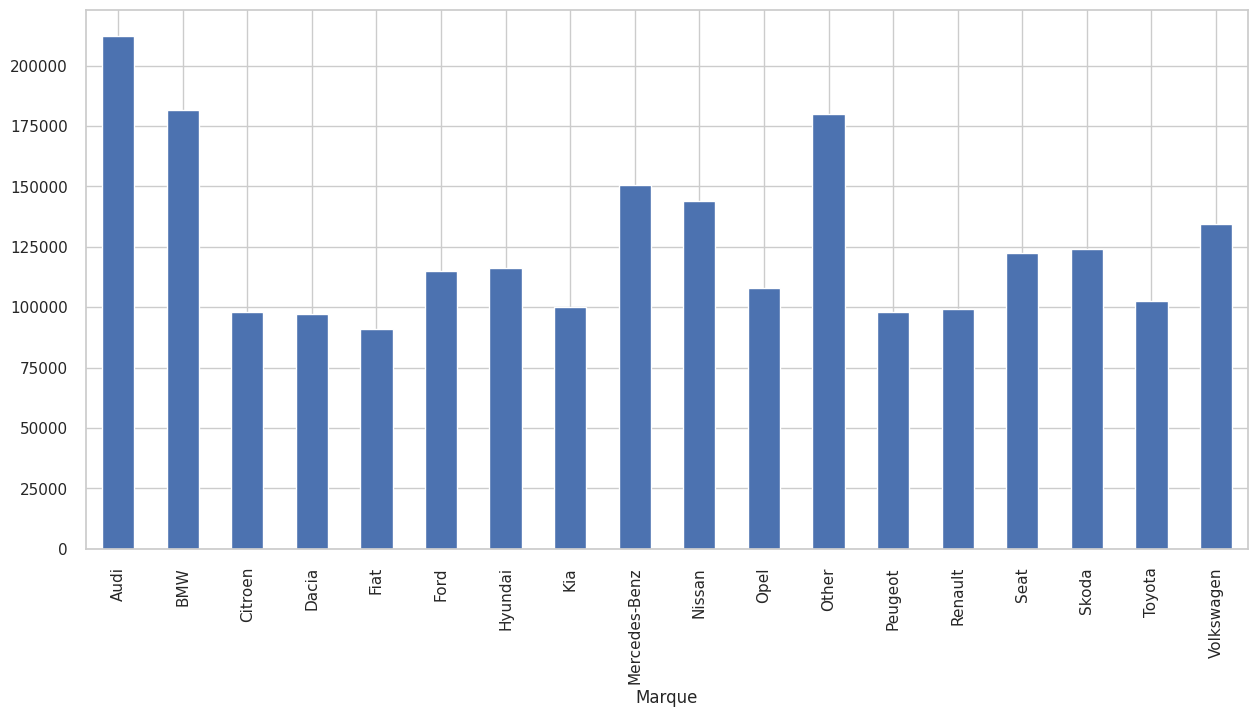

In [68]:
group.plot(kind= "bar", figsize=(15,7))


In [69]:
group2=data.groupby("Type de carburant")["Prix"].mean()
group2.sort_values()

,Prix
Type de carburant,
Essence,88043.685203
Diesel,122973.669599
Electrique,140500.000000
Hybride,188500.000000


<Axes: xlabel='Type de carburant'>

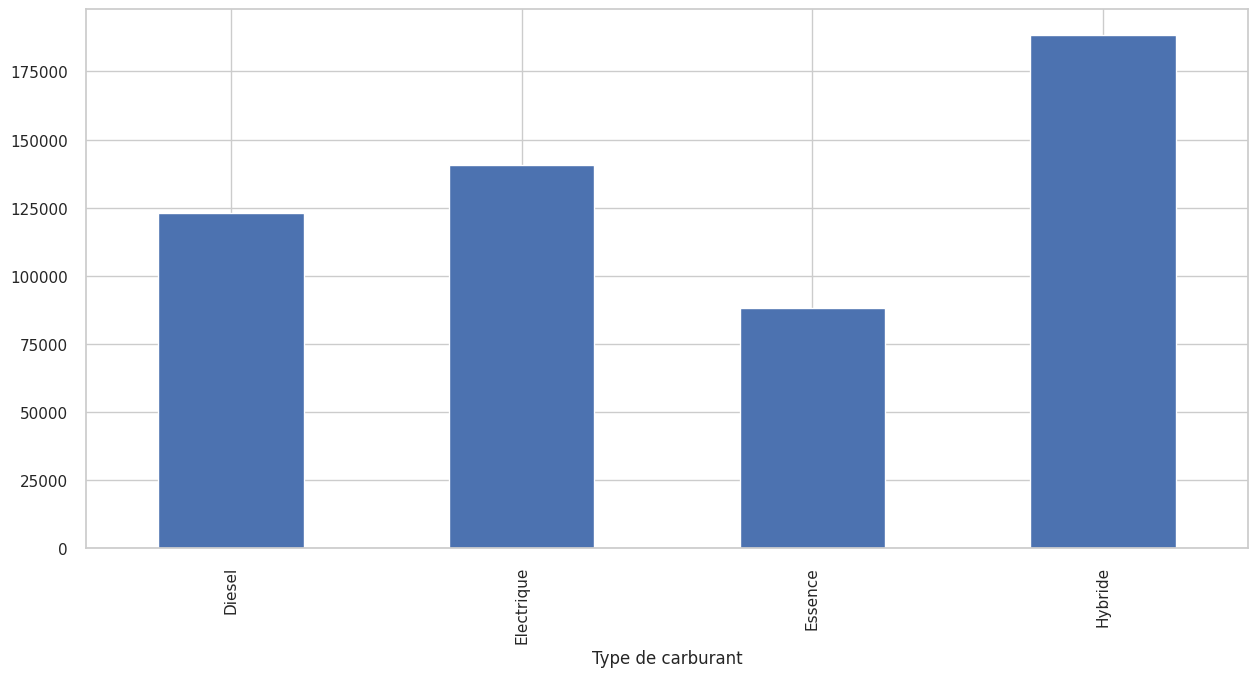

In [70]:
group2.plot(kind= "bar", figsize=(15,7))


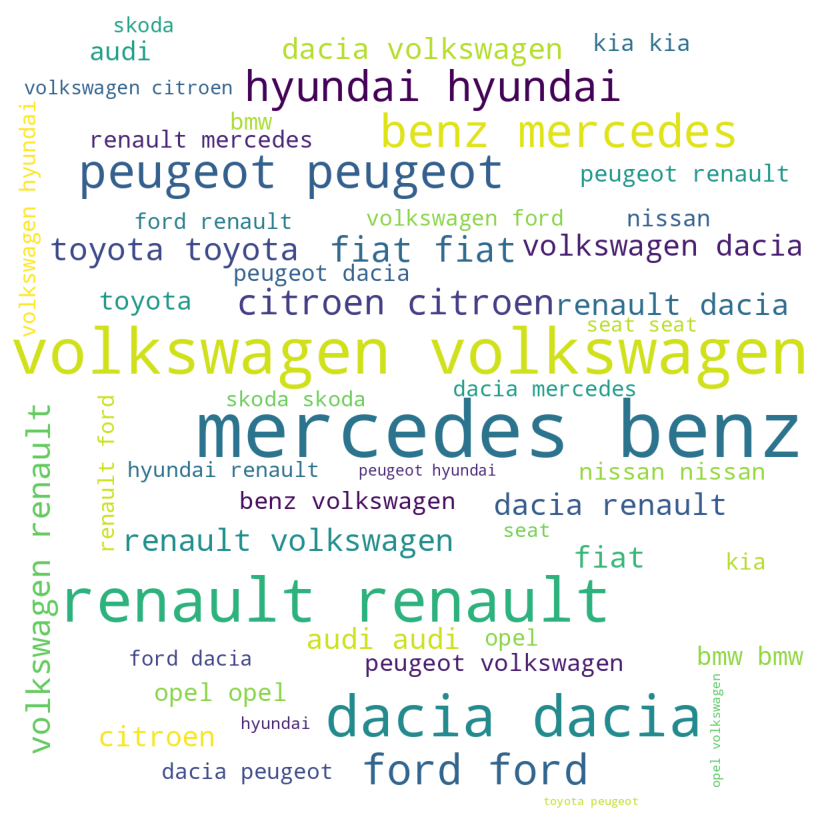

In [71]:
comment_words = ''
stopwords = set(STOPWORDS)


for val in data.Marque:


    val = str(val)


    tokens = val.split()


    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

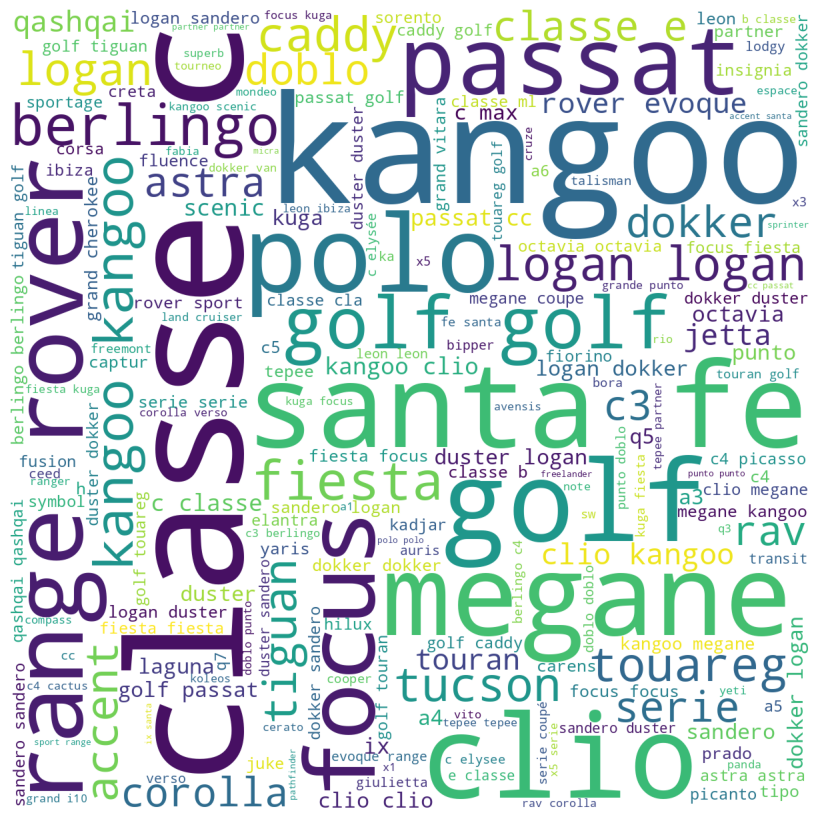

In [72]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in data.Modèle:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [74]:
# voir le data set
data.head()

,Ville,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Puissance fiscale,Boite de vitesses,Nombre de portes,Origine,...,Caméra de recul,Vitres électriques,ABS,ESP,Régulateur de vitesse,Limiteur de vitesse,CD/MP3/Bluetooth,Ordinateur de bord,Verrouillage centralisé à distance,Prix
0,Temara,Fiat,Punto,2007,224999.5,Diesel,5,Manuelle,5,WW au Maroc,...,0,0,1,0,0,0,1,0,0,60000.0
1,Temara,Dacia,Dokker Van,2013,424999.5,Diesel,6,Manuelle,3,WW au Maroc,...,0,0,0,0,0,0,0,0,0,70000.0
2,Casablanca,Dacia,Dokker,2014,164999.5,Diesel,6,Manuelle,5,WW au Maroc,...,0,0,0,0,0,0,0,0,0,90000.0
3,Casablanca,Volkswagen,Touareg,2005,2499.5,Diesel,10,Automatique,5,WW au Maroc,...,0,0,0,0,0,0,0,0,0,90000.0
4,Dakhla,Toyota,Prado,2007,224999.5,Diesel,12,Manuelle,5,WW au Maroc,...,0,0,1,0,0,0,1,0,0,97000.0


In [75]:
LE=LabelEncoder()
LE.fit(data["Marque"])
data["Marque"]=LE.transform(data["Marque"])

LE1=LabelEncoder()
LE1.fit(data["Modèle"])
data["Modèle"]=LE1.transform(data["Modèle"])

LE2=LabelEncoder()
LE2.fit(data["Type de carburant"])
data["Type de carburant"]=LE2.transform(data["Type de carburant"])

LE3=LabelEncoder()
LE3.fit(data['Boite de vitesses'])
data['Boite de vitesses']=LE3.transform(data['Boite de vitesses'])

LE4=LabelEncoder()
LE4.fit(data['Origine'])
data['Origine']=LE4.transform(data['Origine'])

LE6=LabelEncoder()
LE6.fit(data['État'])
data['État']=LE6.transform(data['État'])

LE7=LabelEncoder()
LE7.fit(data['Première main'])
data['Première main']=LE7.transform(data['Première main'])



data.head() # show the data

,Ville,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Puissance fiscale,Boite de vitesses,Nombre de portes,Origine,...,Caméra de recul,Vitres électriques,ABS,ESP,Régulateur de vitesse,Limiteur de vitesse,CD/MP3/Bluetooth,Ordinateur de bord,Verrouillage centralisé à distance,Prix
0,Temara,4,272,2007,224999.5,0,5,1,5,3,...,0,0,1,0,0,0,1,0,0,60000.0
1,Temara,3,159,2013,424999.5,0,6,1,3,3,...,0,0,0,0,0,0,0,0,0,70000.0
2,Casablanca,3,158,2014,164999.5,0,6,1,5,3,...,0,0,0,0,0,0,0,0,0,90000.0
3,Casablanca,17,331,2005,2499.5,0,10,0,5,3,...,0,0,0,0,0,0,0,0,0,90000.0
4,Dakhla,16,270,2007,224999.5,0,12,1,5,3,...,0,0,1,0,0,0,1,0,0,97000.0


In [76]:
LE8=LabelEncoder()
LE8.fit(data["Ville"])
data["Ville"]=LE8.transform(data["Ville"])

In [77]:
data.head() # show the data

,Ville,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Puissance fiscale,Boite de vitesses,Nombre de portes,Origine,...,Caméra de recul,Vitres électriques,ABS,ESP,Régulateur de vitesse,Limiteur de vitesse,CD/MP3/Bluetooth,Ordinateur de bord,Verrouillage centralisé à distance,Prix
0,176,4,272,2007,224999.5,0,5,1,5,3,...,0,0,1,0,0,0,1,0,0,60000.0
1,176,3,159,2013,424999.5,0,6,1,3,3,...,0,0,0,0,0,0,0,0,0,70000.0
2,44,3,158,2014,164999.5,0,6,1,5,3,...,0,0,0,0,0,0,0,0,0,90000.0
3,44,17,331,2005,2499.5,0,10,0,5,3,...,0,0,0,0,0,0,0,0,0,90000.0
4,47,16,270,2007,224999.5,0,12,1,5,3,...,0,0,1,0,0,0,1,0,0,97000.0


In [78]:
X = data.drop(columns="Prix")
y = data["Prix"]    # y = le target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (18582, 28)
X Test  :  (6194, 28)
Y Train :  (18582,)
Y Test  :  (6194,)


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize the Linear Regression model without the `normalize` parameter
LinearRegression_model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)

# Fit the model to the training data
LinearRegression_model.fit(X_train, y_train)

# Score X and Y - train and test sets
print("Score the X-train with Y-train is:", LinearRegression_model.score(X_train, y_train))
print("Score the X-test with Y-test is:", LinearRegression_model.score(X_test, y_test))

# Predict the expected values of Y using X test
y_pred_LR = LinearRegression_model.predict(X_test)

# Calculate R2 score for model performance
LinearRegression_model_score = r2_score(y_test, y_pred_LR)
print("The Score of Linear Regression:", LinearRegression_model_score)


Score the X-train with Y-train is: 0.5092399664496468
Score the X-test with Y-test is: 0.49328430999621986
The Score of Linear Regression: 0.49328430999621986


In [80]:
DecisionTreeRegressor_model=DecisionTreeRegressor()

# fit model

DecisionTreeRegressor_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score de X-train avec Y-train est : ", DecisionTreeRegressor_model.score(X_train,y_train))
print("Score de X-test  avec Y-test  est : ", DecisionTreeRegressor_model.score(X_test,y_test))

# Expected value Y using X test
y_predDTR=DecisionTreeRegressor_model.predict(X_test)

# Model Evaluation

DecisionTreeRegressor_model_score = r2_score(y_test,y_predDTR)
print("  le Score Decision Tree Regressor model  " , DecisionTreeRegressor_model_score)

Score de X-train avec Y-train est :  0.9998593552151535
Score de X-test  avec Y-test  est :  0.9788407980175817
  le Score Decision Tree Regressor model   0.9788407980175817


In [81]:
KNeighborsRegressor_model=KNeighborsRegressor(n_neighbors=5,weights='uniform',algorithm='auto',leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None)

# fit model

KNeighborsRegressor_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score de X-train avec Y-train est : ", DecisionTreeRegressor_model.score(X_train,y_train))
print("Score de X-test  aves Y-test  est : ", DecisionTreeRegressor_model.score(X_test,y_test))

# Expected value Y using X test
y_predKN=KNeighborsRegressor_model.predict(X_test)

# Model Evaluation
KNeighborsRegressor_model_score = r2_score(y_test,y_predKN)
print(" le Score K Neighbors Regressor Model " , KNeighborsRegressor_model_score)

Score de X-train avec Y-train est :  0.9998593552151535
Score de X-test  aves Y-test  est :  0.9788407980175817
 le Score K Neighbors Regressor Model  0.46293041215118313


In [82]:
RandomForestRegressor_model=RandomForestRegressor()

# fit model

RandomForestRegressor_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score de X-train avec Y-train est  : ", RandomForestRegressor_model.score(X_train,y_train))
print("Score de X-test  aves Y-test  est : ", RandomForestRegressor_model.score(X_test,y_test))

# Expected value Y using X test
y_predRFR=RandomForestRegressor_model.predict(X_test)

# Model Evaluation
RandomForestRegressor_model_score = r2_score(y_test,y_predRFR)
print(" le Score Random Forest Regressor Model " , RandomForestRegressor_model_score)

Score de X-train avec Y-train est  :  0.9957353749269304
Score de X-test  aves Y-test  est :  0.9691397908669175
 le Score Random Forest Regressor Model  0.9691397908669175


In [83]:
data.shape

(24776, 29)

In [84]:
# Calculate the full correlation matrix for all numerical features
corr_matrix_full = data.corr()



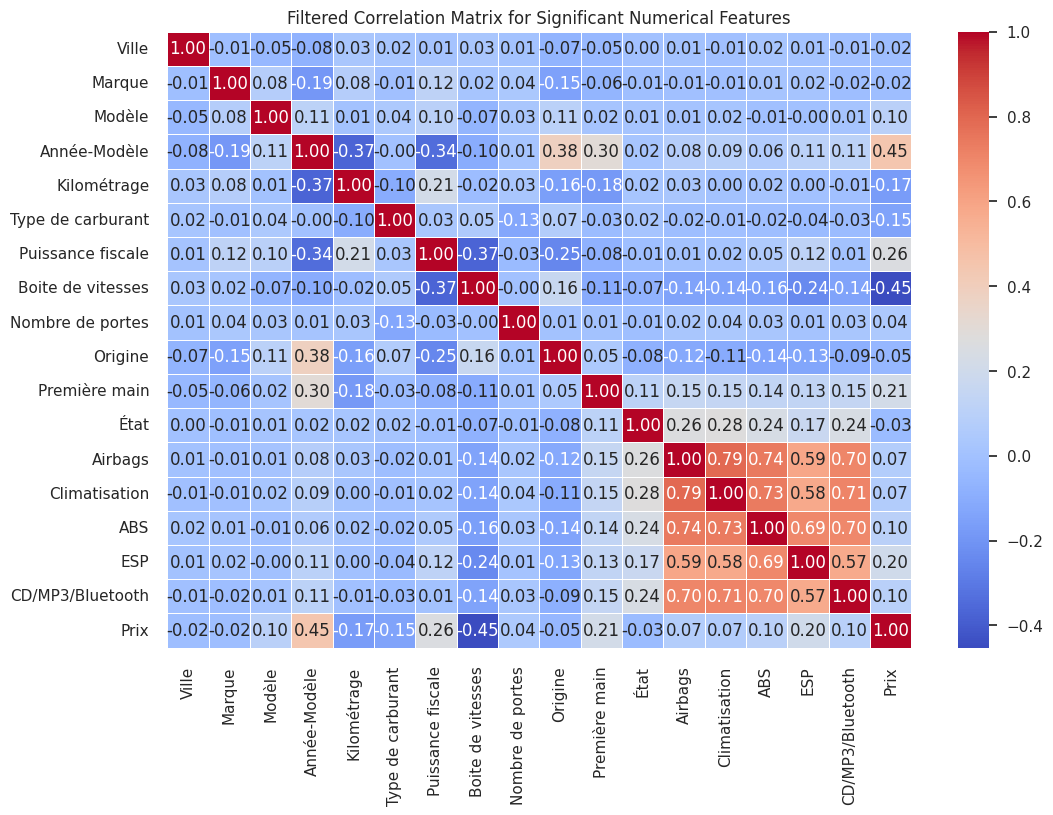

In [85]:
# Filter correlation matrix to include only rows and columns with at least one non-zero correlation
significant_corr = corr_matrix_full[(corr_matrix_full.abs() > 0.1).any(axis=1)]
significant_corr = significant_corr.loc[:, (significant_corr.abs() > 0.1).any(axis=0)]

# Plot the heatmap for the filtered correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(significant_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Filtered Correlation Matrix for Significant Numerical Features')
plt.show()


In [86]:
pip install pycaret

In [87]:
# Import necessary PyCaret regression module
from pycaret.regression import *

# Set up the PyCaret regression environment
# Define the target variable as 'Prix'
regression_setup = setup(
    data=data,
    target='Prix',
    session_id=123,  # Setting a seed for reproducibility
    normalize=True,  # Normalize the features for better performance
    remove_multicollinearity=True,  # Remove highly correlated features
    log_experiment=False,  # You can set this to True if you'd like to track the experiment
)

# Compare baseline models to see which performs best
best_model = compare_models()

# Display the best model
print(best_model)

# Finalize the best model for predictions
final_model = finalize_model(best_model)

# Predict on the original data (or use unseen test data)
predictions = predict_model(final_model)

# Display the predictions
print(predictions)


,Description,Value
0,Session id,123
1,Target,Prix
2,Target type,Regression
3,Original data shape,"(24776, 29)"
4,Transformed data shape,"(24776, 29)"
5,Transformed train set shape,"(17343, 29)"
6,Transformed test set shape,"(7433, 29)"
7,Numeric features,28
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2358.4983,131456726.3536,11291.0799,0.9681,0.0775,0.0195,4.0420
rf,Random Forest Regressor,5746.2938,185122658.2474,13534.3559,0.9550,0.0929,0.0477,5.1820
dt,Decision Tree Regressor,2603.2504,196015463.5129,13754.1842,0.9521,0.0899,0.0213,0.1440
xgboost,Extreme Gradient Boosting,9510.1143,253543595.2000,15891.4871,0.9385,0.1184,0.0815,0.3360
lightgbm,Light Gradient Boosting Machine,13721.2445,550263161.7589,23386.1255,0.8667,0.1618,0.1157,0.5890
gbr,Gradient Boosting Regressor,18350.2433,890230327.1086,29751.0111,0.7845,0.2023,0.1518,1.3210
knn,K Neighbors Regressor,20180.0098,1141678931.2000,33749.0512,0.7235,0.2239,0.1660,0.3670
br,Bayesian Ridge,29530.6567,2066063620.1045,45431.0748,0.4993,0.3794,0.2528,0.1810
llar,Lasso Least Angle Regression,29536.3167,2066065993.0001,45431.0877,0.4993,0.3805,0.2529,0.1790
lar,Least Angle Regression,29536.6982,2066071133.0014,45431.1444,0.4993,0.3806,0.2529,0.1660


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=123)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,968.0204,4194260.7387,2047.9894,0.9990,0.0166,0.0083


       Ville  Marque  Modèle  Année-Modèle  Kilométrage  Type de carburant  \
8304      44       6      69          2012     134999.5                  0   
5845     149      12      41          2005       7499.5                  0   
7937      67       6     363          2011     194999.5                  2   
21034     44       9     278          2018      62499.5                  0   
8633     110       2      85          2006     274999.5                  0   
...      ...     ...     ...           ...          ...                ...   
5954      30      17     331          2010     224999.5                  0   
18411     44       3     161          2013     154999.5                  0   
17554     44       3     232          2016     134999.5                  0   
4583      44      11     194          2019      52499.5                  0   
14883     44       5     178          2017      37499.5                  0   

       Puissance fiscale  Boite de vitesses  Nombre de portes  

In [88]:
tuned_et = tune_model(best_model)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:52:18
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: 

In [89]:
evaluate_model(best_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [90]:
predict_model(best_model)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1558.5681,72017101.4933,8486.2890,0.9827,0.0621,0.0137


,Ville,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Puissance fiscale,Boite de vitesses,Nombre de portes,Origine,...,Vitres électriques,ABS,ESP,Régulateur de vitesse,Limiteur de vitesse,CD/MP3/Bluetooth,Ordinateur de bord,Verrouillage centralisé à distance,Prix,prediction_label
8304,44,6,69,2012,134999.5,0,6,1,5,3,...,0,0,0,0,0,1,0,0,95000.0,95000.0
5845,149,12,41,2005,7499.5,0,8,1,5,3,...,0,0,0,0,0,0,0,0,60000.0,60000.0
7937,67,6,363,2011,194999.5,2,6,1,5,3,...,0,0,0,0,0,0,0,0,60000.0,60730.0
21034,44,9,278,2018,62499.5,0,6,1,5,3,...,0,0,0,0,0,0,0,0,190000.0,190000.0
8633,110,2,85,2006,274999.5,0,6,1,5,0,...,0,1,0,0,0,1,0,0,162000.0,72160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,30,17,331,2010,224999.5,0,10,0,5,0,...,0,0,0,0,0,0,0,0,130000.0,130000.0
18411,44,3,161,2013,154999.5,0,6,1,5,3,...,0,1,1,0,0,1,0,0,105000.0,105000.0
17554,44,3,232,2016,134999.5,0,6,1,5,3,...,0,1,1,0,0,1,0,0,88000.0,88710.0
4583,44,11,194,2019,52499.5,0,6,0,5,3,...,0,1,1,0,0,1,0,0,185000.0,185000.0


In [91]:
from pycaret.regression import save_model

# Save the tuned model
save_model(best_model, 'extra_trees_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Ville', 'Marque', 'Modèle',
                                              'Année-Modèle', 'Kilométrage',
                                              'Type de carburant',
                                              'Puissance fiscale',
                                              'Boite de vitesses',
                                              'Nombre de portes', 'Origine',
                                              'Première main', 'État',
                                              'Jantes aluminium', 'Airbags',
                                              'Climatisation',
                                              'Système de navigation/GPS',
                                              'Toit ouvrant', 'Sièges cuir',...
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('remove_multico

In [92]:
from google.colab import files

# Download the model file
files.download('extra_trees_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [93]:
# Assuming `LE`, `LE1`, `LE2`, etc., are the encoders used in Colab
np.save('le_marque_classes.npy', LE.classes_)
np.save('le_modele_classes.npy', LE1.classes_)
np.save('le_type_carburant_classes.npy', LE2.classes_)
np.save('le_boite_vitesses_classes.npy', LE3.classes_)
np.save('le_origine_classes.npy', LE4.classes_)
np.save('le_etat_classes.npy', LE6.classes_)
np.save('le_premiere_main_classes.npy', LE7.classes_)
np.save('le_ville_classes.npy', LE8.classes_)


In [94]:
from google.colab import files

# Download each encoder file
files.download('le_marque_classes.npy')
files.download('le_modele_classes.npy')
files.download('le_type_carburant_classes.npy')
files.download('le_boite_vitesses_classes.npy')
files.download('le_origine_classes.npy')
files.download('le_etat_classes.npy')
files.download('le_premiere_main_classes.npy')
files.download('le_ville_classes.npy')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [95]:
data.shape

(24776, 29)